*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [76]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [77]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [78]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture


In [79]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture


In [80]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture,1


In [81]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture,1


In [82]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture,1,positive


In [83]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,...,profile_id,post_id,link,followers,engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture,1,positive,Sunday,Afternoon


### Checking, if the final combined dataframe looks fine

In [84]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,...,profile_id,post_id,link,followers,engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,picture,1,positive,Sunday,Afternoon
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,...,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060,other,1,positive,Sunday,Afternoon
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,...,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090,video,1,positive,Sunday,Afternoon
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,...,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007,picture,1,neutral,Sunday,Evening
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,...,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000,video,0,positive,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17604,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,20,NaN,...,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22.000000,picture,0,positive,Saturday,Evening
17605,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,7,NaN,...,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9.000000,picture,1,neutral,Saturday,Evening
17606,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,621,NaN,...,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,701.000018,video,1,neutral,Sunday,Morning
17607,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,49,NaN,...,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,63.000013,picture,1,positive,Saturday,Evening


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [85]:
from pymer4.models import Lmer

In [86]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [87]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [88]:
# Define the formula for the multilevel regression model with varying slopes
formula = 'engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type|followers) + (1 + has_emoji|followers) + (1 + sentiment|followers) + (1 + day_of_week|followers) + (1 + time_of_day|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1+post_type|followers)+(1+has_emoji|followers)+(1+sentiment|followers)+(1+day_of_week|followers)+(1+time_of_day|followers)

Family: gaussian	 Inference: parametric

Number of observations: 17609	 Groups: {'followers': 3.0}

Log-likelihood: -123936.823 	 AIC: 248001.647

Random effects:

                             Name        Var      Std
followers             (Intercept)      0.000    0.000
followers        post_typepicture   4684.179   68.441
followers          post_typevideo      0.235    0.485
followers.1           (Intercept)     44.281    6.654
followers.1             has_emoji    215.995   14.697
followers.2           (Intercept)      0.000    0.000
followers.2      sentimentneutral    755.704   27.490
followers.2     sentimentpositive    236.090   15.365
followers.3           (Intercept)    249.024   15.780
foll

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),142.819,43.561,242.076,50.642,0.111,2.820,0.734,
post_typepicture,26.784,-52.092,105.659,40.243,1.724,0.666,0.584,
post_typevideo,-4.002,-21.166,13.161,8.757,662.159,-0.457,0.648,
has_emoji,-0.384,-19.202,18.433,9.601,2.062,-0.040,0.972,
sentimentneutral,0.184,-36.511,36.880,18.723,1.873,0.010,0.993,
sentimentpositive,24.145,-0.580,48.870,12.615,1.902,1.914,0.202,
day_of_weekMonday,25.814,-8.918,60.545,17.721,1.878,1.457,0.290,
day_of_weekSaturday,-7.527,-42.358,27.304,17.771,1.934,-0.424,0.714,
day_of_weekSunday,-9.497,-29.160,10.167,10.033,3.228,-0.947,0.409,
day_of_weekThursday,17.125,-31.277,65.527,24.695,1.929,0.693,0.562,


In [89]:
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),142.818738,43.561462,242.076014,50.642398,0.110674,2.820142,0.734177,
post_typepicture,26.783533,-52.091801,105.658867,40.243257,1.723659,0.665541,0.583550,
post_typevideo,-4.002384,-21.165983,13.161216,8.757100,662.159197,-0.457044,0.647789,
has_emoji,-0.384329,-19.201633,18.432975,9.600842,2.061739,-0.040031,0.971608,
sentimentneutral,0.184443,-36.511346,36.880232,18.722685,1.872999,0.009851,0.993087,
sentimentpositive,24.145184,-0.579564,48.869932,12.614899,1.901764,1.914021,0.202243,
day_of_weekMonday,25.813554,-8.918315,60.545423,17.720667,1.878352,1.456692,0.290028,
day_of_weekSaturday,-7.526655,-42.357736,27.304425,17.771286,1.934108,-0.423529,0.714342,
day_of_weekSunday,-9.496692,-29.160342,10.166958,10.032659,3.227898,-0.946578,0.409185,
day_of_weekThursday,17.124923,-31.276751,65.526598,24.695186,1.929074,0.693452,0.562020,


In [90]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
model.fixef

,(Intercept),post_typepicture,post_typevideo,has_emoji,sentimentneutral,sentimentpositive,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,time_of_dayEvening,time_of_dayMorning
high,142.818738,104.339791,-3.452823,-12.560699,26.801589,39.022491,56.513010,21.501338,0.366805,62.385289,37.078233,71.287336,-27.330559,108.565956
low,142.818738,-2.122141,-4.207209,-2.114441,-5.933037,20.725898,5.681929,-15.420056,-11.471801,-13.542304,-6.501938,-7.358632,0.895859,-16.913677
medium,142.818738,-21.867050,-4.347119,13.522154,-20.315223,12.687164,15.245723,-28.661248,-17.385080,2.531785,-1.742436,2.140639,39.689597,16.456334


### Get group level deviates from population level coefficients (i.e. rfx)

In [91]:
model.ranef

,X.Intercept.,post_typepicture,post_typevideo,X.Intercept..1,has_emoji,X.Intercept..2,sentimentneutral,sentimentpositive,X.Intercept..3,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,X.Intercept..4,time_of_dayEvening,time_of_dayMorning
high,0.0,77.556258,0.549561,-5.513230,-12.176370,0.0,26.617146,14.877306,-1.176022,30.699456,29.027993,9.863497,45.260366,27.466947,49.264222,88.920363,-31.748858,72.529752
low,0.0,-28.905675,-0.204825,-0.783362,-1.730113,0.0,-6.117480,-3.419286,-12.103229,-20.131625,-7.893400,-1.975109,-30.667227,-16.113224,-29.381746,-75.481569,-3.522440,-52.949881
medium,0.0,-48.650583,-0.344736,6.296593,13.906483,0.0,-20.499666,-11.458020,13.279251,-10.567831,-21.134593,-7.888388,-14.593139,-11.353723,-19.882476,-13.438795,35.271298,-19.579870


<Axes: xlabel='Estimate'>

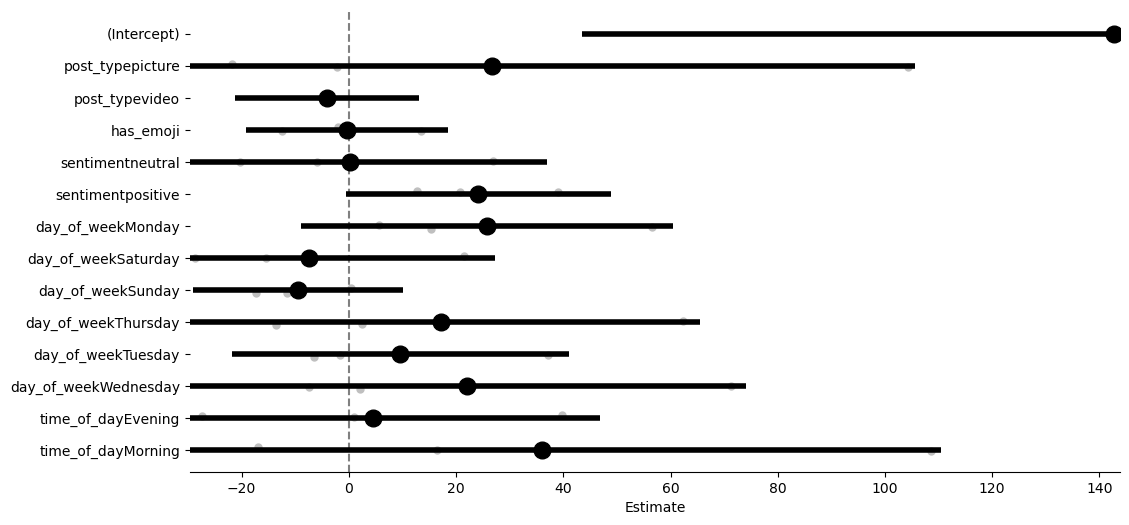

In [92]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

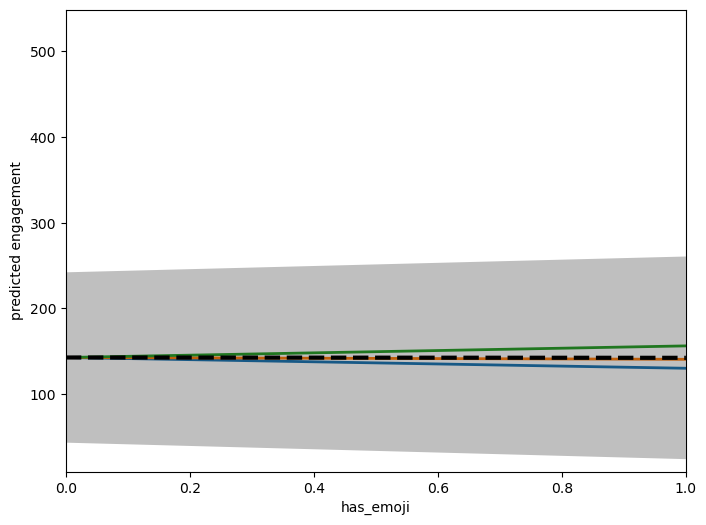

In [93]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

KeyError: 'post_type'

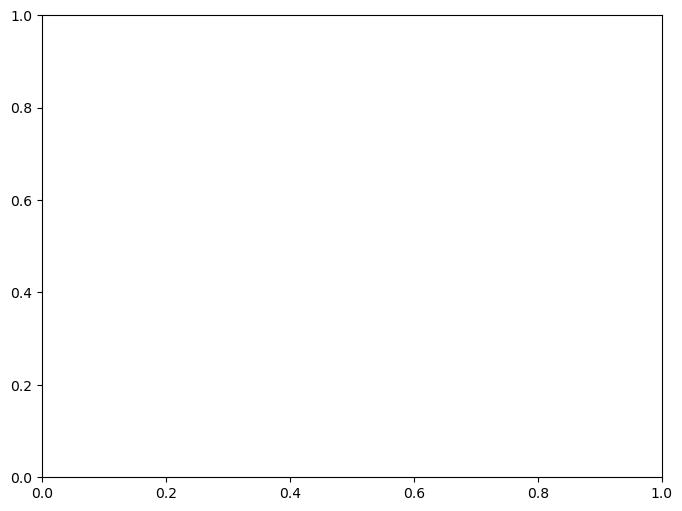

In [94]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
